In [ ]:
import  pandas as pd

In [ ]:
dados = pd.read_csv('CC GENERAL.csv')
dados

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Pre-Processamento
Limpando e Organizando os dados

In [ ]:
# Removendo as colunas que não vao agregar em minha analize
dados.drop(columns=['CUST_ID','TENURE'], inplace=True)# inplace = TRUE apaga diretamente da base original

In [ ]:
dados = dados.rename(columns={'BALANCE': 'limite_dis',
                              'PURCHASES': 'compras_total',
                              'ONEOFF_PURCHASES': 'compras_vista',
                              'INSTALLMENTS_PURCHASES': 'compras_parceladas',
                              'BALANCE_FREQUENCY': 'freq_limite_disp',
                              'CASH_ADVANCE': 'saque',
                              'PURCHASES_FREQUENCY': 'freq_compra',
                              'ONEOFF_PURCHASES_FREQUENCY': 'freq_compra_vista',
                              'PURCHASES_INSTALLMENTS_FREQUENCY': 'freq_compra_parc',
                              'CASH_ADVANCE_FREQUENCY': 'freq_saque',
                              'PAYMENTS': 'pagamentos',
                              'MINIMUM_PAYMENTS': 'pagamento_min',
                              'PRC_FULL_PAYMENT': 'pagamento_integral'})

In [ ]:
 missing = dados.isna().sum()
 # valores vazios, nulos
 missing

limite_dis              0
freq_limite_disp        0
compras_total           0
compras_vista           0
compras_parceladas      0
saque                   0
freq_compra             0
freq_compra_vista       0
freq_compra_parc        0
freq_saque              0
CASH_ADVANCE_TRX        0
PURCHASES_TRX           0
CREDIT_LIMIT            1
pagamentos              0
pagamento_min         313
pagamento_integral      0
dtype: int64

In [ ]:
dados.fillna(dados.median(), inplace = True) # Coloco a média nesses valores faltantes
missing                                    # a média dos valores minimos desta coluna

limite_dis              0
freq_limite_disp        0
compras_total           0
compras_vista           0
compras_parceladas      0
saque                   0
freq_compra             0
freq_compra_vista       0
freq_compra_parc        0
freq_saque              0
CASH_ADVANCE_TRX        0
PURCHASES_TRX           0
CREDIT_LIMIT            1
pagamentos              0
pagamento_min         313
pagamento_integral      0
dtype: int64

## `Padronizar`
Ou seja, como minha coluna limite, está com valores inteiros de 0 ate infinito e a outra coluna frequência de limite, elas se relacionam , mais essa coluna frequência limite, e de 0 até 1, logo utilizo a normalização.

# Padronização ou  normalização
Coloco em escalas minha feactures(caracteristicas dos meus dados).
Ou seja, se tenho colunas em meus dados como: numero de filhos e salario, elas estão em escalas diferentes.

________________________________________________________________________________


 Meus numeros de filhos não cheaga a mil , mais meu salario sim, isso atrapalha o modelo de aprendizado dando maior importancia ao que tem maior escala, como salario, ou ate mesmo limite de credito disponivel que e nosso caso.

_______________________________________________________________________________
  

Padronizar seria colocar minha média igual a 0, e desvio igual a 1.
No caso meu caso meus dados estaria entre 0 até 1 a minha coluna. Trabalho com a coluna, pego meus valores da coluna, sbtrai pela média, e divide pelo desvio padrao da coluna.

Redimensionamento, serve para normalizar os dados.


________________________________________________________________________________

#  Normalizar ou Redimensionanizar
Normalizando os dados deixo eles em algum intervalo de 0 e 1.
meu desvio padrao e menor, pq meus dados vão estar mais proximos da média.
consiste em subtrair o valor mínimo e dividir pela diferença entre o valor máximo e o mínimo de cada variável.

Trabalho com a coluna tbm, meu menor valor e 0 e maior valor e 1.

Se eu possuir dados muitos dispersos, utilizo a biblioteca MaxabsScaler pois
ele garante que meus dados vao ir de -1 até +1


________________________________________________________________________________


### A biblioteca Normalizer ela funciona nas linhas e não nas colunas.
Pega as operaçoes por linhas.

In [ ]:
# Como meus dados não estão normalizados, vou normalizar.
# Coluna limite disponivel tem valores min e max, e a frequência desse limite esta entre 0 E 1
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dados.values)
values


array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [ ]:
dados

,limite_dis,freq_limite_disp,compras_total,compras_vista,compras_parceladas,saque,freq_compra,freq_compra_vista,freq_compra_parc,freq_saque,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,pagamentos,pagamento_min,pagamento_integral
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [ ]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
dados_normalizado = norm.fit_transform(dados)
dados_normalizado

## Executando o Cluster

In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dados.values)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Validação dos Clusters

O coeficiente de silhueta é uma medida de quão bem um ponto se encaixa em seu cluster e quão distante ele está dos clusters vizinhos. Ele varia de -1 a 1, sendo que valores próximos de 1 indicam um bom agrupamento e valores próximos de -1 indicam um agrupamento ruim.

In [ ]:
from sklearn import metrics
labels= kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3646070028151538


O índice Davies-Bouldin (DBI) é uma métrica para avaliar algoritmos de agrupamento. É um esquema de avaliação interno, onde a validação de quão bem o agrupamento foi feito é feita usando quantidades e características inerentes ao conjunto de dados.

O DBI é definido como a razão entre a dispersão dentro do cluster e a separação entre os clusters. Quanto menor o valor, melhor a separação dos clusters e a "compacidade" dentro dos clusters.




# Os índices davies-bouldin e calinski harabasz utilizam centróides em seus cálculos.



In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075160963579686


O índice Calinski é uma forma de medir se os grupos que você formou com os seus dados fazem sentido ou não. Ele compara duas coisas: quão próximos os dados estão dentro de cada grupo, e quão distantes os grupos estão entre si.

________________________________________________________________________________


Se os dados estão bem próximos dentro dos grupos, e bem distantes entre os grupos, isso significa que os grupos são bem definidos e separados. O índice Calinski é um número que representa essa relação. Quanto maior o índice, melhor os grupos.

In [ ]:
# O parâmetro values é uma matriz que contém os valores normalizados dos seus dados,
# que foram transformados pela função Normalizer do módulo sklearn.preprocessing.

# O parâmetro labels é um vetor que contém os rótulos previstos para cada amostra dos seus dados,
 #que foram obtidos pela função fit_predict do objeto kmeans.
calinski = metrics.calinski_harabasz_score (values, labels)

print(calinski)

3431.58551532451


In [ ]:
def clustering_algorithm(n_clusters, dados):
  kmeans = KMeans(n_clusters= n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dados)
  s = metrics.silhouette_score(dados, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dados, labels)
  calinski = metrics.calinski_harabasz_score(dados, labels)
  return s, dbs, calinski


In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)


0.32723725045744956 1.3087180692590692 3526.4587169299934


In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)


0.36454251490514644 1.0758267918409525 3431.7919693770777


# Estruturaçao dos clusters

In [ ]:
dados.count()

limite_dis            8950
freq_limite_disp      8950
compras_total         8950
compras_vista         8950
compras_parceladas    8950
saque                 8950
freq_compra           8950
freq_compra_vista     8950
freq_compra_parc      8950
freq_saque            8950
CASH_ADVANCE_TRX      8950
PURCHASES_TRX         8950
CREDIT_LIMIT          8950
pagamentos            8950
pagamento_min         8950
pagamento_integral    8950
dtype: int64

In [ ]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03971093935721628 3.5177545397609578 302.76323927067966
0.36454251490514644 1.0758267918409525 3431.7919693770777


In [ ]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3688486109603572 1.0588202114905991 1204.064049138465
0.35334015818511877 1.1425530668073534 1194.9476793630297
0.36704573758244236 1.0990426578873274 1167.5322875560996


# Gerando Grafico de duas variaveis

<function matplotlib.pyplot.show(close=None, block=None)>

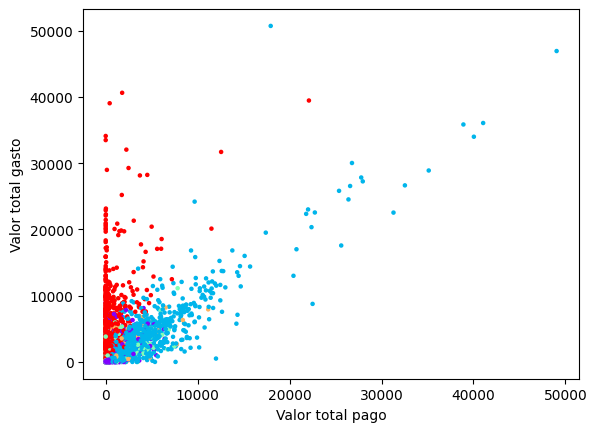

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dados['compras_total'], dados['pagamentos'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show

In [ ]:
import seaborn as sns
dados['cluster'] = labels
#sns.pairplot(dados[0:], hue='cluster')

In [ ]:
dados.groupby('cluster').describe()

limite_dis                                                    \
             count         mean          std        min          25%   
cluster                                                                
0           3287.0   444.316391   846.429565   0.000000    23.394451   
1           1540.0  1145.339059  1664.041010   0.000000   212.974614   
2           2642.0  3044.311461  2482.114159   6.824905  1263.747824   
3            399.0  1974.217809  1838.076622  70.794108  1012.508134   
4           1082.0  1799.423099  1979.373755   0.000000   508.591283   

                                                freq_limite_disp            \
                 50%          75%           max            count      mean   
cluster                                                                      
0          83.148283   411.938506   9630.367575           3287.0  0.774261   
1         558.133650  1373.997246  19043.138560           1540.0  0.927935   
2        2173.994774  4237.041814  18495.558550           2642.0  0.964891   
3        1322.647480  2138.678431  11670.179850            399.0  0.989170   
4        1099.666578  2321.485425  14581.459140           1082.0  0.862883   

         ... pagamento_min               pagamento_integral            \
         ...           75%           max              count      mean   
cluster  ...                                                            
0        ...    249.201172   4483.503862             3287.0  0.246341   
1        ...    526.841759  18621.013310             1540.0  0.277899   
2        ...   1331.273048   8345.641905             2642.0  0.001772   
3        ...   7305.064790  76406.207520              399.0  0.019899   
4        ...    887.859119  21235.065300             1082.0  0.115930   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346540  0.0  0.0  0.000000  0.444444  1.0  
1        0.366802  0.0  0.0  0.083333  0.545455  1.0  
2        0.023236  0.0  0.0  0.000000  0.000000  0.6  
3        0.092198  0.0  0.0  0.000000  0.000000  1.0  
4        0.186293  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [ ]:
centroide = kmeans.cluster_centers_
centroide

array([[6.91547390e-02, 2.30581917e-04, 1.21698996e-01, 4.82278963e-02,
        7.35725210e-02, 2.46403809e-02, 1.72617165e-04, 3.36721687e-05,
        1.40088252e-04, 7.94705003e-06, 1.25159439e-04, 2.86132629e-03,
        9.43365633e-01, 1.53844563e-01, 5.68736541e-02, 7.59957504e-05],
       [1.60585709e-01, 2.45218719e-04, 4.38064576e-01, 2.56754863e-01,
        1.81478003e-01, 2.62770656e-02, 2.04443367e-04, 8.90407438e-05,
        1.50686013e-04, 9.46810479e-06, 1.74038115e-04, 6.17603447e-03,
        6.02329772e-01, 4.04388683e-01, 8.58048582e-02, 7.18481123e-05],
       [5.05890305e-01, 2.73068755e-04, 6.25559287e-02, 3.68154874e-02,
        2.57622119e-02, 2.50096730e-01, 6.83022335e-05, 2.62345319e-05,
        4.55565431e-05, 5.70526899e-05, 1.14548582e-03, 1.34969401e-03,
        7.18871804e-01, 1.66266897e-01, 1.80430662e-01, 5.33805925e-07],
       [3.26679916e-01, 2.64829600e-04, 1.56367224e-01, 3.20340338e-02,
        1.24729430e-01, 5.86775487e-02, 1.64809825e-04, 2.315

In [ ]:
max = len(centroide[0])
for i in range(max):
  print(dados.columns.values[i],"\n{:.4f}".format(centroide[:, i].var())) # A variânca das cordenadas dos centroides.
#  essas colunas apresentam variabilidade na coordenada do centroide.

In [ ]:
 # limite_dis 0.0224
#compras_total  0.0196
#saque  0.0226
#CREDIT_LIMIT  0.0360
#pagamentos  0.0280


In [ ]:
description = dados.groupby("cluster")['limite_dis','compras_total', 'saque', 'CREDIT_LIMIT', 'pagamentos']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description.round(2)
print(description)

          limite_dis  compras_total        saque  CREDIT_LIMIT   pagamentos  \
cluster                                                                       
0         444.316391     630.614116   143.241332   5130.908661   814.983226   
1        1145.339059    3269.532519   184.313078   4089.000098  3048.332290   
2        3044.311461     388.784455  1622.217251   4490.934898   967.870896   
3        1974.217809     851.108872   418.674573   2220.050125  1333.712115   
4        1799.423099     465.816645  3283.984219   3983.938274  4666.441630   

         n_clients  
cluster             
0             3287  
1             1540  
2             2642  
3              399  
4             1082  


<ipython-input-30-82d659396285>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dados.groupby("cluster")['limite_dis','compras_total', 'saque', 'CREDIT_LIMIT', 'pagamentos']


CLUSTER 0: Clientes que gastam pouco. Clientes Com maior limite. Bons pagadores. Maior numero de clientes


CLUSTER 1: Clientes que gastam muito com compras. Melhores pagadores


CLUSTER 2: Clientes que gastam mais. Foco deles e saque. Piores pagadores. boa quantidade de clientes


CLUSTER 3:Clientes com menor valor de limite. Nao sao bons pagadores. Menor quantidade de clientes


CLUSTER 4:clientes que gastam muito com saque. Pagam na maioria das vezes

In [ ]:
dados.groupby('cluster')['pagamento_integral'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3287.0,0.25,0.35,0.0,0.0,0.00,0.44,1.0
1,1540.0,0.28,0.37,0.0,0.0,0.08,0.55,1.0
2,2642.0,0.00,0.02,0.0,0.0,0.00,0.00,0.6
3,399.0,0.02,0.09,0.0,0.0,0.00,0.00,1.0
4,1082.0,0.12,0.19,0.0,0.0,0.08,0.14,1.0


In [ ]:
dados

,limite_dis,freq_limite_disp,compras_total,compras_vista,compras_parceladas,saque,freq_compra,freq_compra_vista,freq_compra_parc,freq_saque,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,pagamentos,pagamento_min,pagamento_integral,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0
